In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import cv2

**Loading the data**

In [24]:
data_dir = r"D:\My Work\Syllabus\SDGP\Datasets\OriginalProject\Project\Apples"

In [25]:
path = os.path.join(data_dir,"OldApproach")

In [26]:
print(os.path.exists(path))

True


In [27]:
train_dir = os.path.join(path,"Train")
test_dir = os.path.join(path,"Test")

In [29]:
train_good_apples = os.path.join(train_dir,"Good apples")
train_bad_apples = os.path.join(train_dir,"Bad apples")
test_good_apples = os.path.join(test_dir,"Good apples")
test_bad_apples = os.path.join(test_dir,"Bad apples")

**Understanding the data**

In [30]:
num_good_apples_train = len(os.listdir(train_good_apples))
num_bad_apples_train = len(os.listdir(train_bad_apples))
num_good_apples_test = len(os.listdir(test_good_apples))
num_bad_apples_test = len(os.listdir(test_bad_apples))

total_train = num_good_apples_train + num_bad_apples_train
total_test = num_good_apples_test + num_bad_apples_test

In [31]:
print('Total training Good apples: ', num_good_apples_train)
print('Total training Bad apples: ', num_bad_apples_train)

print('Total testing Good apples: ', num_good_apples_test)
print('Total testing Bad apples: ', num_bad_apples_test)

print("--")
print("Total training apples: ", total_train)
print("Total testing apples: ", total_test)

Total training Good apples:  1100
Total training Bad apples:  1100
Total testing Good apples:  400
Total testing Bad apples:  400
--
Total training apples:  2200
Total testing apples:  800


In [32]:
size = 64
epochs = 15
IMG_HEIGHT = 100
IMG_WIDTH = 100

**Preparing the data**

In [33]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for training data
test_image_generator = ImageDataGenerator(rescale=1./255) # Generator for testing data

In [34]:
train_gen = train_image_generator.flow_from_directory(batch_size = size, directory = train_dir, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 2200 images belonging to 2 classes.


In [35]:
test_gen = test_image_generator.flow_from_directory(batch_size = size, directory = test_dir, target_size = (IMG_HEIGHT,IMG_WIDTH), class_mode = 'binary')

Found 800 images belonging to 2 classes.


In [36]:
classes_array = ['Good Apples','Bad Apples']

**Creating the model**

In [37]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 100, 100, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 50, 50, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 25, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)             

In [ ]:
history = model.fit_generator(
    train_gen,
    steps_per_epoch=total_train,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=total_test
)

Epoch 1/15
 823/2200 [==========>...................] - ETA: 16:21 - loss: 0.6931 - accuracy: 0.5009

**Training the data**

In [ ]:
model.fit(train_gen, epochs=15, validation_data=(test_gen))

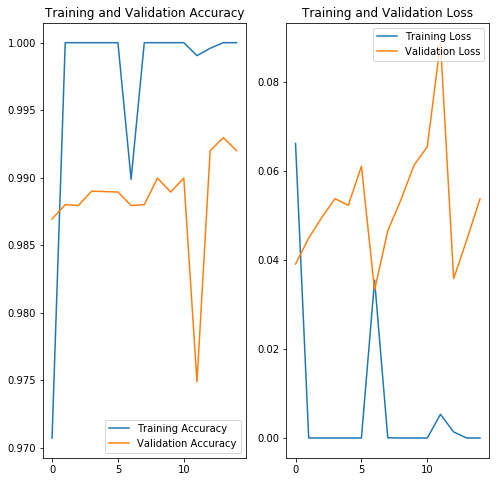

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(30, 20))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [20]:
# def prepare(filepath):
#     IMG_SIZE = 100
#     img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
#     new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
#     return new_array.reshape(-3,IMG_SIZE,IMG_SIZE,3)
# prep_file = 'apple_1.jpg'
# prep_file = tf.cast(prep_file, tf.float32)
# prediction = model.predict([prepare(prep_file)])
# print(prediction)

In [20]:
model.save('fresty.h5')

In [2]:
from tensorflow.keras.models import load_model
import numpy as np

In [3]:
model = load_model('fresty.h5')

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
img = cv2.imread('apple_1.jpg')
img = cv2.resize(img,(100,100))
img = np.reshape(img,[-3,100,100,3])
img = tf.cast(img, tf.float32)

In [24]:
classes = model.predict_classes(img)
if classes[0]==0:
    print("Bad apples")
elif classes[0]==1:
    print("Good apples")

Good apples


In [76]:
#O for bad apples 1 for good apples